<a href="https://colab.research.google.com/github/swflora/ML/blob/main/API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import lightgbm

lightgbm.__version__

'4.1.0'

# Python Wrapper AP 방식

In [11]:
import lightgbm as lgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 다중 분류를 하기 위한 준비
iris = load_iris()
X, y = iris.data, iris.target
print(X.shape, y.shape)

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


# skikit-learn 방식은 바로 모델 클래스 불러오고 학습

# 자신만의 객체 생성
# lightgbm 구분되는 특징
# 핵심 코드
train_data = lgb.Dataset(X_train, label = y_train)
test_data = lgb.Dataset(X_test, label = y_test)

print(type(train_data))

# 하이퍼파라미터 튜닝
params = {
    'objective': 'multiclass', # 다중 분류
    'num_class': 3,  # Number of classes in the dataset
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05, # 경사하강법
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# 공식 문서 : https://lightgbm.readthedocs.io/en/latest/Parameters.html#objective-parameters
# objective: 모델을 돌리는 목적
# lightgbm에선 모델을 사용할 때 어떤 목적으로 사용할 것인지를 명시해야함
# num_class : 다중분류에서 분리할 클래스
# metric : 평가 지표
# boosting_type : 부스팅 알고리즘
# 나머지 : 하이퍼파라미터, 꼭 쓸 필요는 없음


# 모델 학습
num_round = 5 # 몇 번 학습을 수행할 것인지
# python API 방식
model = lgb.train(params, train_data, num_round, valid_sets = [test_data])
# warning 메세지: 더 이상 분류할 것이 없다.

# 예측
y_pred = model.predict(X_test)
y_pred_max = [list(x).index(max(x)) for x in y_pred]
# 모델 평가
accuracy = accuracy_score(y_test, y_pred_max)
print("Accuracy:", accuracy)


(150, 4) (150,)
(120, 4) (30, 4) (120,) (30,)
<class 'lightgbm.basic.Dataset'>
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

# python Scikit-Learn API 방식
- 모델을 학습하는 구간의 코드가 다름

- 공부하는 입장에선 두 가지를 혼용해서 배우기는 어려움
- 프로젝트를 진행할 때 방식을 선택해야함


In [14]:
import lightgbm as lgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 다중 분류를 하기 위한 준비
iris = load_iris()
X, y = iris.data, iris.target
print(X.shape, y.shape)

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# 모델 학습
lgb_clf = lgb.LGBMClassifier(objective='multiclass',
                                    num_class=3,  # Number of classes in the dataset
                                    num_leaves=31,
                                    learning_rate=0.05,
                                    feature_fraction=0.9,
                                    bagging_fraction=0.8,
                                    bagging_freq=5)

# 공식 문서 : https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html
# lgb.train에 들어가는 파라미터와 대부분은 같지만 일부는 조금씩 다른 점이 있음
# 두 가지 방식을 공부할 때 주의점

lgb_clf.fit(X_train,y_train)

y_pred = lgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)



(150, 4) (150,)
(120, 4) (30, 4) (120,) (30,)
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000047 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 91
[LightGBM] [Info] Number of data points in the train set: 120,

# XGboost 방식

In [16]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 다중 분류를 하기 위한 준비
iris = load_iris()
X, y = iris.data, iris.target

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
xgb_clf = xgb.XGBClassifier(objective='multi:softmax',  # 다중 분류
                             num_class=3,  # 클래스 개수
                             booster='gbtree',  # 트리 기반 부스팅
                             max_depth=6,  # 트리 최대 깊이
                             learning_rate=0.1,  # 학습률
                             n_estimators=100)  # 트리 개수

xgb_clf.fit(X_train, y_train)

# 예측
y_pred = xgb_clf.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


1.0


## 세 방식 중 하나를 정해서 사용하는 것이 좋음
## 가장 괜찮은 건 Python Wrapper API

# 시각화 해석
- 기준은 피처 중요도
- 중요한 변수를 회귀식에서 주요 변수로 사용할 수 있다고 착각할 수 있음
- But, 잘못된 전제

- 피처 중요도는 다중 분류를 하다가 발생한 것
  + 다중 분류를 하기 위한 피처 중요도임을 의미
  + 회귀식에 참고는 할 수 있지만 중요하다는 확정을 내리기는 어려움

- 회귀식
  + 영향을 많이 준다 -> 유의미한 영향이 있다 단계로 풀어감
  + 실제 영향이 있는지 확인하기 위해선 다항 로지스틱 회귀분석을 해 결과가 실제로 일치하는 지 확인하고 결론을 내려야 함

- 결정 트리에서 분할 기준을 나눌 때 참고하는 것이 맞음


Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

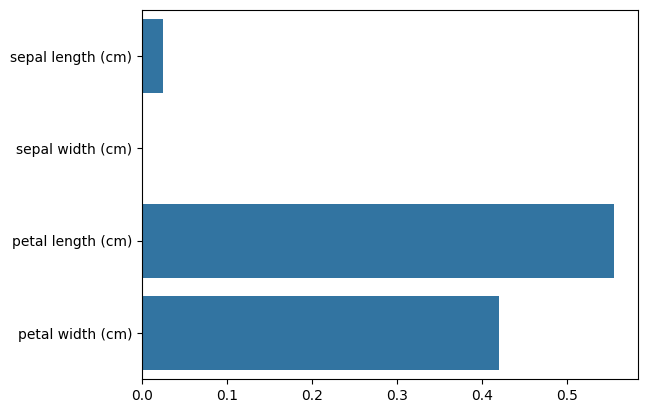

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습.
dt_clf.fit(X_train , y_train)

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)

# 결정 트리 과적합
- 결정트리는 과적합에 매우 약해 적절하게 제어해야함

p.216
# 랜덤




In [20]:
# 데이터 불러오기
from google.colab import drive
drive.mount("/content/drive")

import pandas as pd

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

def get_human_dataset( ):

    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv("/content/drive/MyDrive/머신러닝/data/human_activity/features.txt",sep='\s+',
                                  header=None,names=['column_index','column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('/content/drive/MyDrive/머신러닝/data/human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('/content/drive/MyDrive/머신러닝/data/human_activity/test/X_test.txt',sep='\s+', names=feature_name)

    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('/content/drive/MyDrive/머신러닝/data/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('/content/drive/MyDrive/머신러닝/data/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])

    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7352, 561) (2947, 561) (7352, 1) (2947, 1)


In [22]:
X_train.info()
# 너무 많아서 셀 수 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [23]:
y_train['action'].value_counts()
# 다중 분류 필요

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

# Random Forest

- 데이터셋이 커지면 학습 시간이 좀 더 길어짐

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_clf = RandomForestClassifier(random_state = 0)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [26]:
# 결과 확인
pred = rf_clf.predict(X_test)
accuracy_score(y_test, pred)

0.9253478113335596

In [27]:
# 결과 비교
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

rf_clf = RandomForestClassifier(random_state = 0)
rf_clf.fit(X_train, y_train)

pred = rf_clf.predict(X_test)
accuracy_score(y_test, pred)

0.9253478113335596

# 머신러닝 성능 올리는 방법
1. 샘플링 해결
2. 교차검증을 통해서 해결
3. 하이퍼파라미터 튜닝 통해서 해결
4. 데이터 재가공해서 해결
5. 모델의 종류를 변경하면서 해결

어떤 상황에서 모델의 성능이 올라갔는지 체크해야함
학습 시간 & 모형 성능을 고려해 최종적인 모델을 선택
